In [1]:
#Import Libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, RFE
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Define x and y

In [4]:
x = df.iloc[:,:-1]
y = df['class']

In [5]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Univariate Selection

- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [6]:
#Chi square for feature selection

In [7]:
test = SelectKBest(score_func=chi2, k=5)

In [8]:
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000022797DBBEE0>)

In [9]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [10]:
chi_test = pd.DataFrame(test.scores_).T
chi_test.columns = x.columns

In [11]:
chi_test

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


# Recursive Feature Elimination

In [12]:
#RFE with logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
rfe = RFE(LogisticRegression())

In [15]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [16]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1,1,3,4,5,1,1,2


In [17]:
#read the data

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [21]:
rfe.ranking_

array([ 1,  9,  7,  8, 10, 12, 11,  1,  1,  1,  1,  5,  6,  1,  1,  3,  1,
        1,  1,  2,  4])

In [22]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,9,accelerations
2,7,fetal_movement
3,8,uterine_contractions
4,10,light_decelerations
5,12,severe_decelerations
6,11,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [23]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
13,1,histogram_max
14,1,histogram_number_of_peaks
16,1,histogram_mode
17,1,histogram_mean
18,1,histogram_median


# RFE with Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier

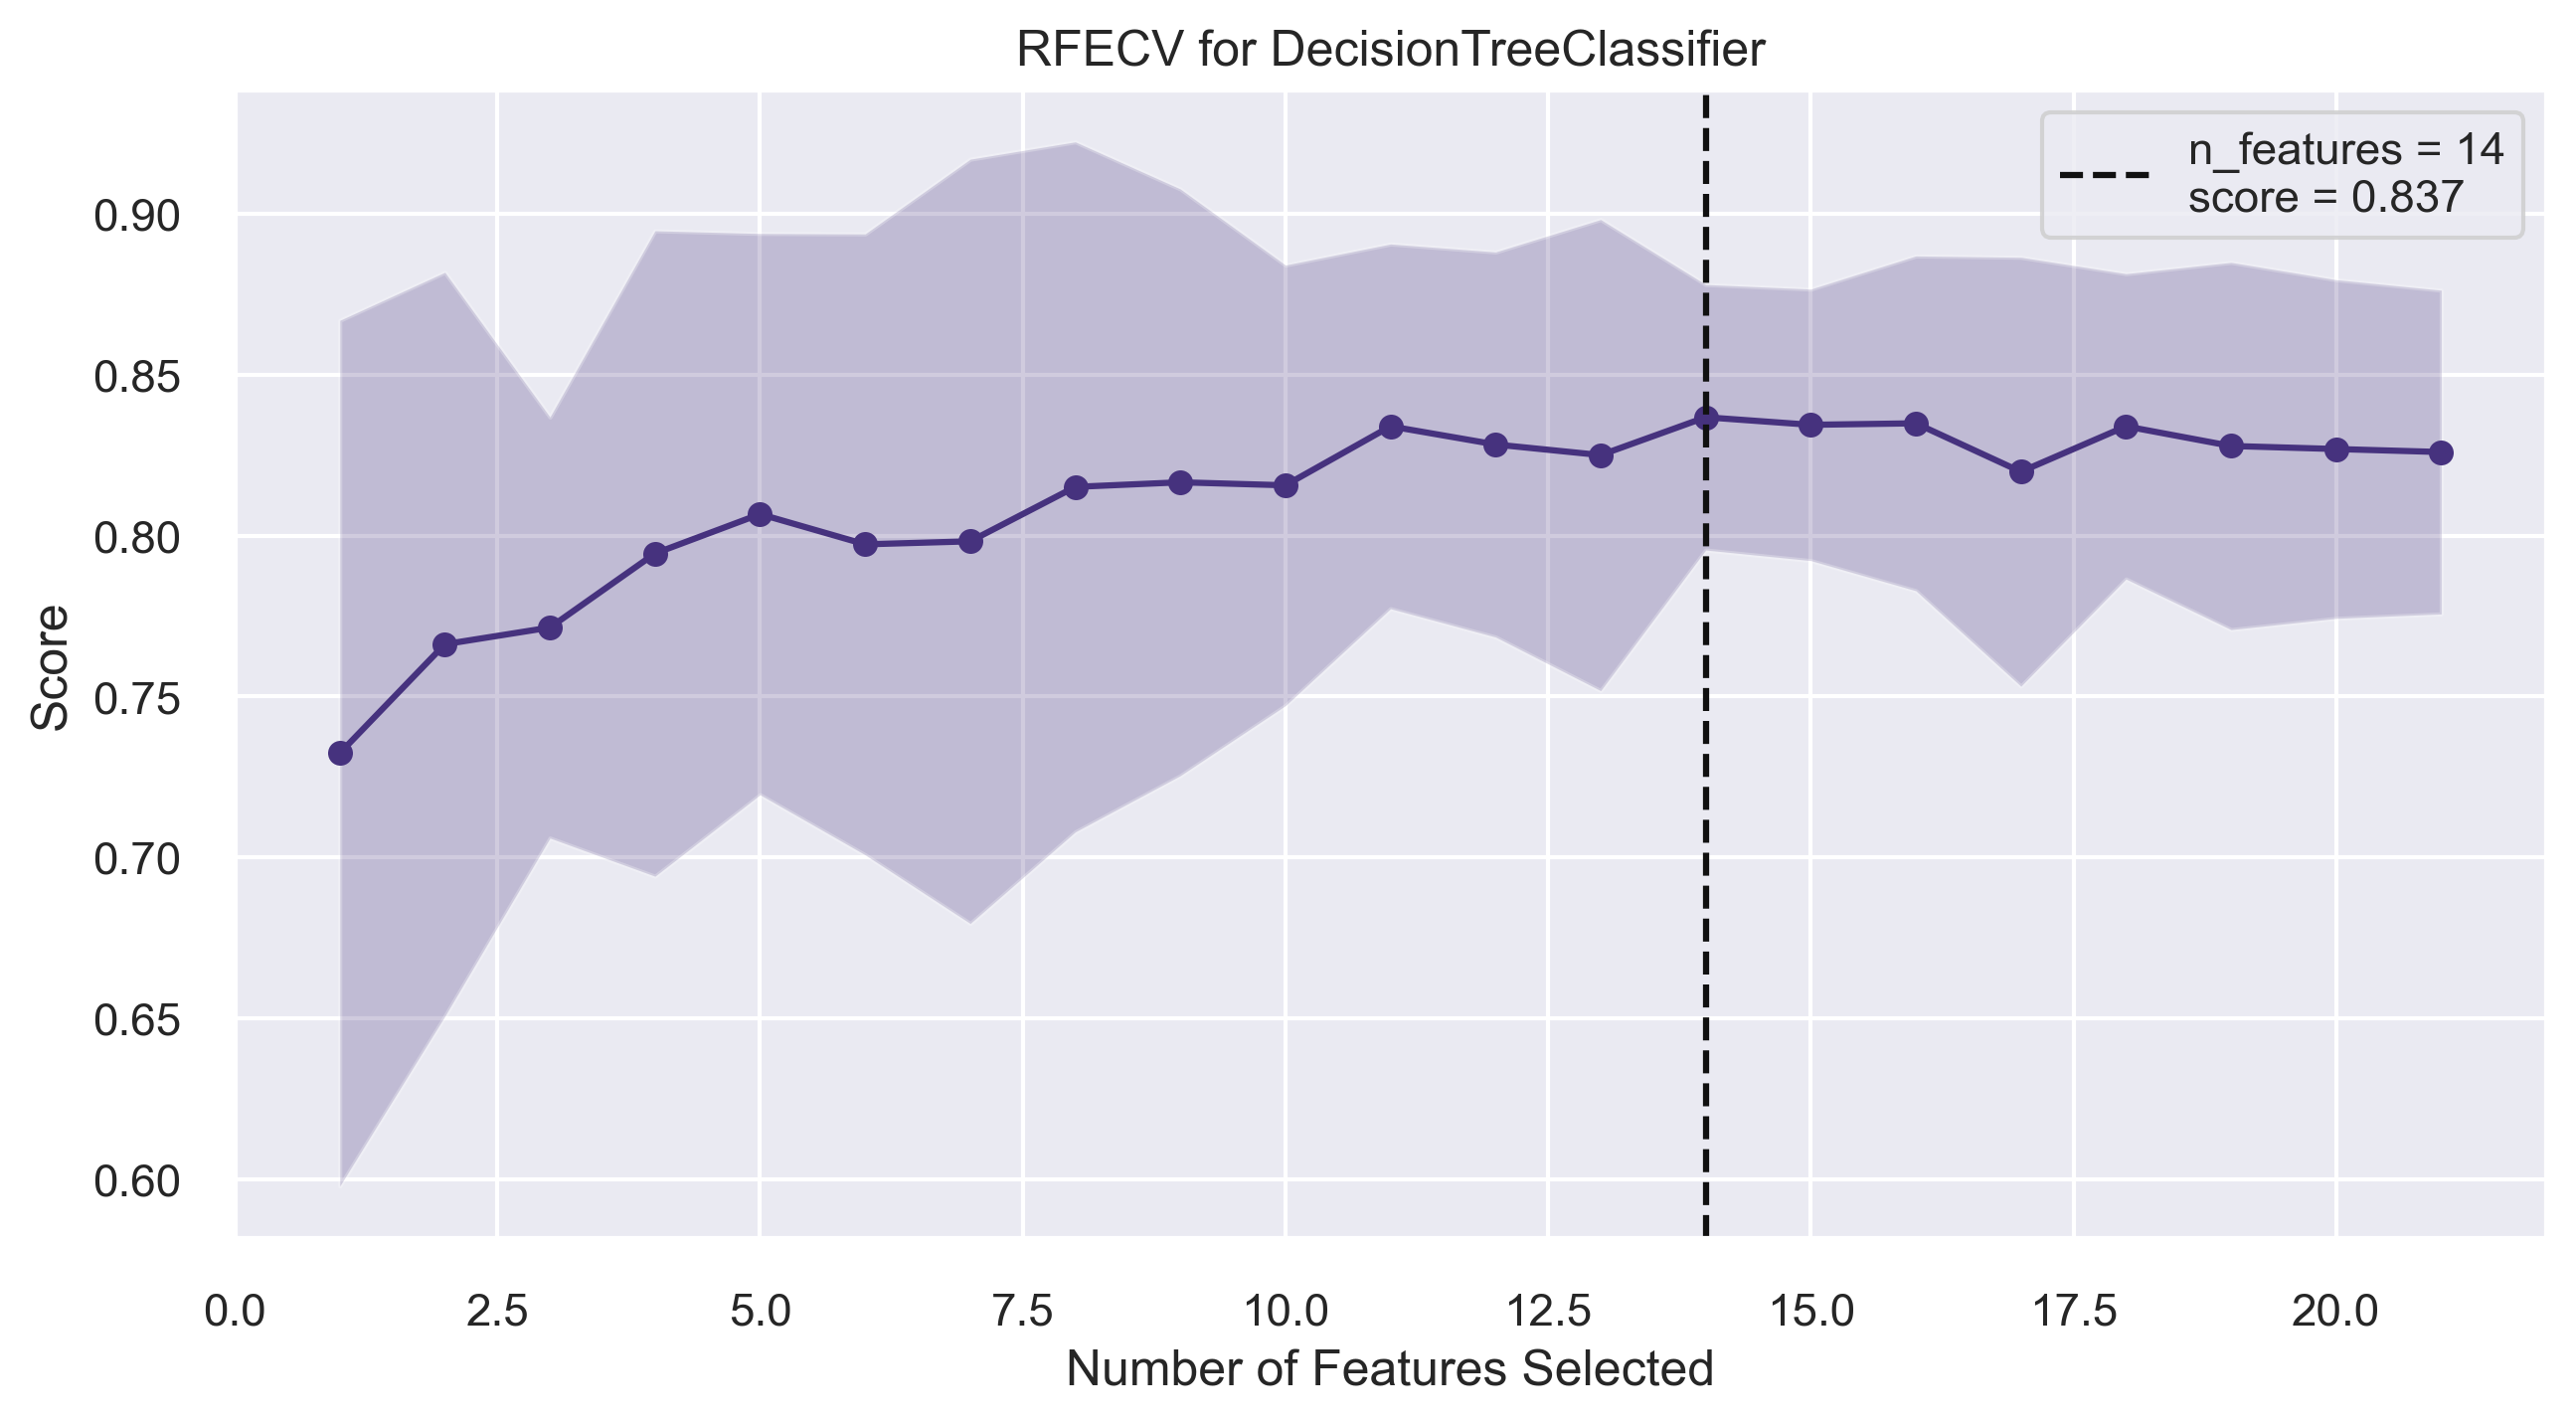

In [25]:
rfe_dt = rfecv(DecisionTreeClassifier(),x,y)

In [26]:
rfe_dt.ranking_

array([1, 1, 3, 1, 4, 8, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 1, 1, 5, 1, 6])

In [27]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe_dt.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,1,accelerations
2,3,fetal_movement
3,1,uterine_contractions
4,4,light_decelerations
5,8,severe_decelerations
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [28]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
1,1,accelerations
3,1,uterine_contractions
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
12,1,histogram_min
13,1,histogram_max


# Tree Based method

In [29]:
#Tree Based method

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [31]:
dt.feature_importances_

array([0.02086586, 0.03068424, 0.01156147, 0.02460995, 0.00561553,
       0.        , 0.01413244, 0.11582852, 0.2539628 , 0.13625987,
       0.02302843, 0.01402664, 0.01726883, 0.05716272, 0.01711789,
       0.00329994, 0.01947714, 0.21256945, 0.00405905, 0.01543952,
       0.00302972])

In [32]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [33]:
imp_cols

,Features,IG
0,baseline value,0.020866
1,accelerations,0.030684
2,fetal_movement,0.011561
3,uterine_contractions,0.024610
4,light_decelerations,0.005616
5,severe_decelerations,0.000000
6,prolongued_decelerations,0.014132
7,abnormal_short_term_variability,0.115829
8,mean_value_of_short_term_variability,0.253963
9,percentage_of_time_with_abnormal_long_term_var...,0.136260


In [34]:
imp_cols.sort_values(by = 'IG', ascending=False)

,Features,IG
8,mean_value_of_short_term_variability,0.253963
17,histogram_mean,0.212569
9,percentage_of_time_with_abnormal_long_term_var...,0.136260
7,abnormal_short_term_variability,0.115829
13,histogram_max,0.057163
1,accelerations,0.030684
3,uterine_contractions,0.024610
10,mean_value_of_long_term_variability,0.023028
0,baseline value,0.020866
16,histogram_mode,0.019477
